In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
true_df = pd.read_csv("C:\\Users\\simra\\Downloads\\NLP Project\\News-_dataset\\True.csv")
fake_df=pd.read_csv("C:\\Users\\simra\\Downloads\\NLP Project\\News-_dataset\\Fake.csv")

In [3]:
#Add label Column
true_df['label'] = 0
fake_df['label'] = 1
#true_df

In [4]:
#Combined Both Files 
combined_df = pd.concat([true_df, fake_df], ignore_index=True)
#combined_df

In [5]:
combined_df=combined_df.drop(['date'],axis=1)

In [6]:
combined_df['Text'] = combined_df['title'] + " " + combined_df['text'] + " " + combined_df['subject']
combined_df=combined_df.drop(['title','text','subject'],axis=1)

In [7]:
y = combined_df['label'].values
X = combined_df.drop(['label'],axis=1)

In [8]:
#Before PreProcessing
X['sequence_length'] = X['Text'].apply(lambda x: len(x.split()))

In [9]:
mean_length = X['sequence_length'].mean()
median_length = X['sequence_length'].median()
mode_length = X['sequence_length'].mode()[0]  # Mode can have multiple values, so we choose the first one
max_length = X['sequence_length'].max()

print("Mean length:", mean_length)
print("Median length:", median_length)
print("Mode length:", mode_length)
print("Maximum Length:", max_length)

Mean length: 418.7707247538866
Median length: 376.0
Mode length: 407
Maximum Length: 8149


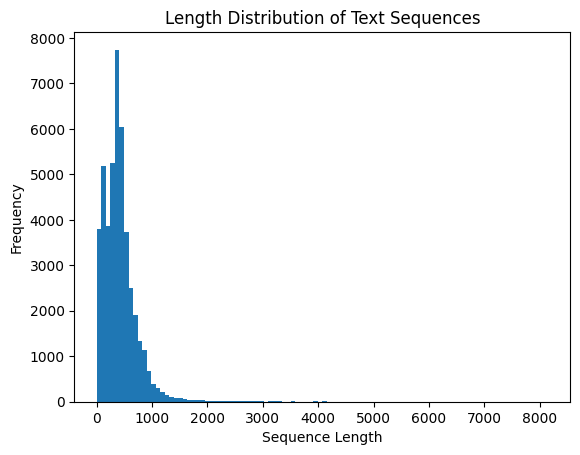

In [10]:
plt.hist(X['sequence_length'], bins=100)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Length Distribution of Text Sequences')
plt.show()

In [11]:
corpus = X['Text'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 147710 unique tokens.


In [12]:
#Remove Reuters word From True News
def Remove_Reuters(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
X['Text'] = X['Text'].apply(Remove_Reuters)

In [13]:
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing encoding error sym
    txt = re.sub('[^a-z$0-9]', ' ', txt.lower())
    return txt 

In [14]:
X['Text'] = X['Text'].apply(cleanText)

In [15]:
#After-Preprocessing
X['sequence_lengthpp'] = X['Text'].apply(lambda x: len(x.split()))

In [16]:
mean_lengthpp = X['sequence_lengthpp'].mean()
median_lengthpp = X['sequence_lengthpp'].median()
mode_lengthpp = X['sequence_lengthpp'].mode()[0]
max_lengthpp = X['sequence_lengthpp'].max()

print("Mean length:", mean_lengthpp)
print("Median length:", median_lengthpp)
print("Mode length:", mode_lengthpp)
print("Maximum Length:", max_lengthpp)

Mean length: 255.2915720076618
Median length: 226.5
Mode length: 249
Maximum Length: 5230


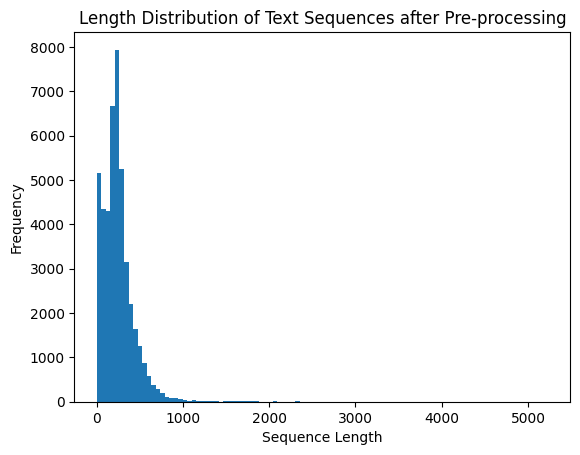

In [17]:
plt.hist(X['sequence_lengthpp'], bins=100)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Length Distribution of Text Sequences after Pre-processing')
plt.show()

In [18]:
corpus_post = X['Text'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus_post)

# Obtain the word-to-index dictionary
word2idx = tokenizer.word_index

# Print the number of unique tokens
print('Found %s unique tokens.' % len(word2idx))

Found 121713 unique tokens.
